In [1]:
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

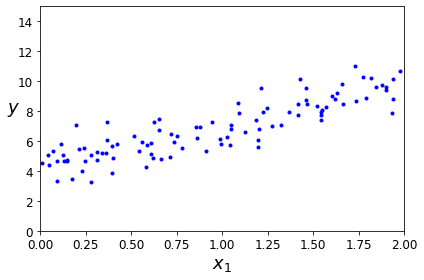

In [4]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.axis([0,2,0,15])
plt.show()

In [9]:
X_b=np.c_[np.ones((100, 1)), X] #모든 샘플에 x0=1 추가
#정규방정식
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best #y=4x+3+gaussian_noise

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1추가
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

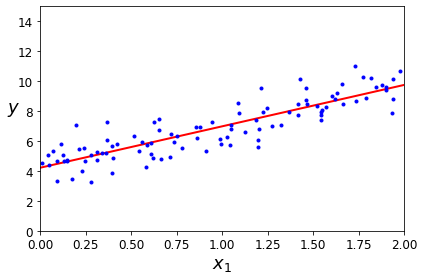

In [13]:
plt.plot(X_new,y_predict,"r-",linewidth=2,label='predict')
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.axis([0,2,0,15])
plt.show()


In [14]:
#사이킷런 사용
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [23]:
eta=0.1 #학습률
n_iterations=1000
m=100
theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta* gradients

In [24]:
theta

array([[4.21509616],
       [2.77011339]])

In [25]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [30]:
theta_path_bgd=[]

def plot_gredient_descent(theta,eta,theta_path=None):
    m=len(X_b)
    plt.plot(X,y,"b.")
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict=X_new_b.dot(theta)
            style="b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta= {}$".format(eta),fontsize=16)

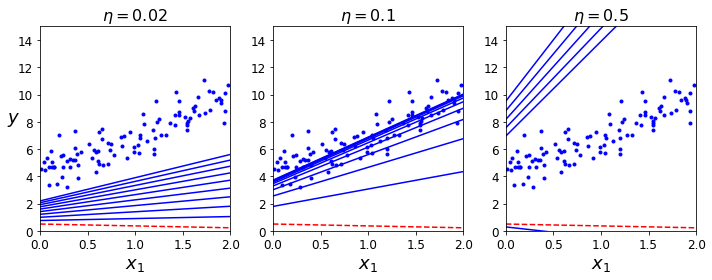

In [32]:
np.random.seed(42)
theta=np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gredient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);plot_gredient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133);plot_gredient_descent(theta,eta=0.5)

plt.show()

In [33]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

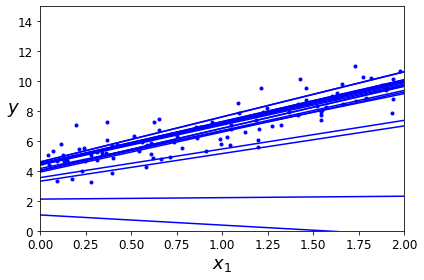

In [36]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict=X_new_b.dot(theta)
            style="b-"if i>0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.axis([0,2,0,15])
plt.show()


In [37]:
theta

array([[4.20755702],
       [2.743584  ]])

In [39]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=5,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.10549653]), array([2.86315909]))

In [43]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) 

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t=0
for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    X_b_shuffled=X_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi=X_b_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)


In [44]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [45]:
theta_path_bgd=np.array(theta_path_bgd)
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)

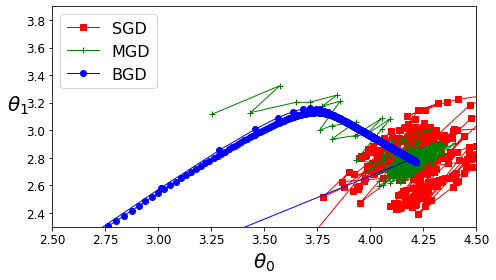

In [49]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="SGD")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=1,label="MGD")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth=1,label="BGD")
plt.legend(loc='upper left',fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$  ",fontsize=20,rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()


In [50]:
import numpy.random as rnd

np.random.seed(42)

In [51]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

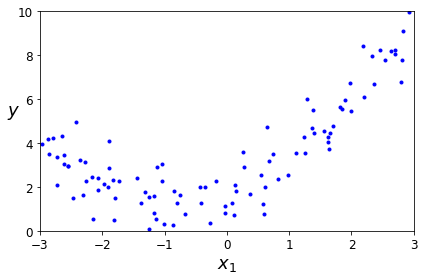

In [52]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()


In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [55]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [57]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

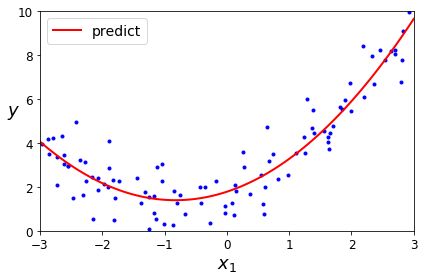

In [59]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="predict")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc='upper left',fontsize=14)
plt.axis([-3,3,0,10])
plt.show()


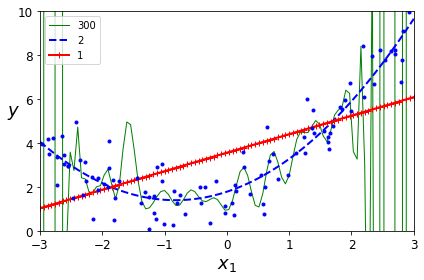

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_regression=Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg)
    ])
    polynomial_regression.fit(X,y)
    y_newbig=polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
    
plt.plot(X,y,"b.")
plt.legend(loc='upper left')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()
# degree =300의 다항회귀모델은 훈련데이터에 과대적함임을 알 수 있음

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("training sets", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)              

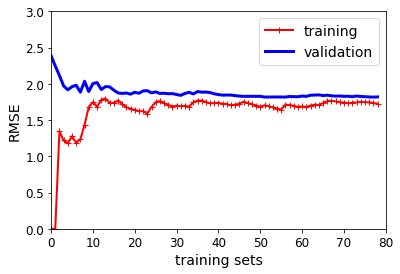

In [75]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()
#과소적합

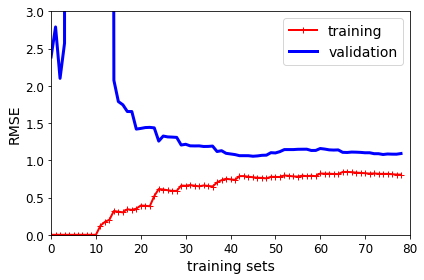

In [81]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()
# 과소적합 모델보다는 훈련세트에서는 낮은 오차를 보여주지만,
#두 곡선 사이에 공간이 있음-> 검증데이터에서는 성능이 훨씬 안좋음

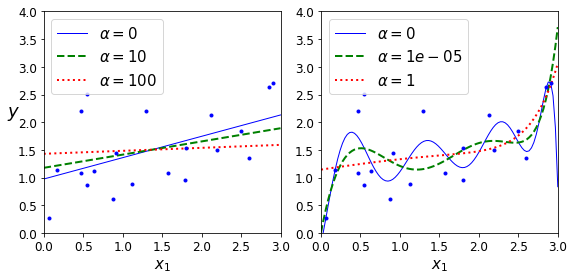

In [86]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha,style in zip(alphas,("b-","g--","r:")):
        model=model_class(alpha,**model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model=Pipeline([
                ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                 ('std_scaler',StandardScaler()),
                ('regul_reg',model)
            ])
        model.fit(X,y)
        y_new_regul=model.predict(X_new)
        lw=2 if alpha>0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=r"$\alpha={}$".format(alpha))
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc='upper left',fontsize=15)
    plt.xlabel("$x_1$",fontsize=15)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.show()



In [87]:
ridge_reg=Ridge(alpha=1,solver='cholesky',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [95]:
sgd_reg=SGDRegressor(max_iter=50,penalty="l2",tol=1e-3,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [96]:
ridge_reg=Ridge(alpha=1,solver='sag',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [98]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

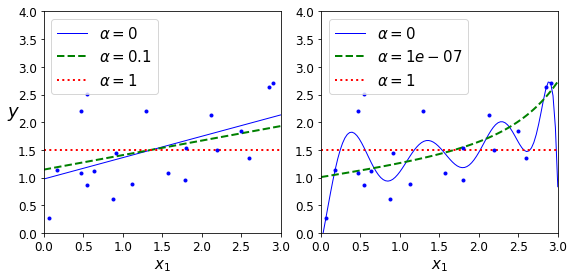

In [99]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),tol=1,random_state=42)
plt.show()

In [101]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

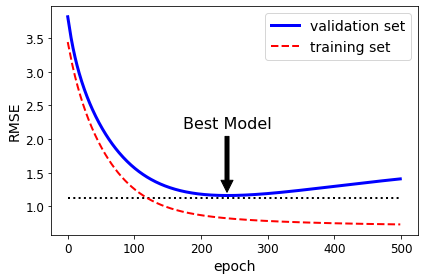

In [104]:
#조기종료
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=2+X+0.5*X**2+np.random.randn(m,1)

X_train,X_val,y_train,y_val = train_test_split(X[:50],y[:50].ravel(),test_size=0.5,random_state=10)
poly_scaler=Pipeline([
    ('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
    ('std_sclaer',StandardScaler())
])
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(max_iter=1,penalty=None,eta0=0.0005,warm_start=True,learning_rate="constant",random_state=42)
n_epochs=500
train_errors,val_errors=[],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict=sgd_reg.predict(X_train_poly_scaled)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
    
best_epoch=np.argmin(val_errors)
best_val_rmse=np.sqrt(val_errors[best_epoch])

plt.annotate("Best Model",xy=(best_epoch,best_val_rmse),
            xytext=(best_epoch,best_val_rmse+1),ha='center',arrowprops=dict(facecolor='k',shrink=0.05),
            fontsize=16)

best_val_rmse-=0.03
plt.plot([0,n_epochs],[best_val_rmse,best_val_rmse],'k:',linewidth=2)
plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="validation set")
plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="training set")
plt.legend(loc='upper right',fontsize=14)
plt.xlabel("epoch",fontsize=14)
plt.ylabel("RMSE",fontsize=14)
plt.show()


In [107]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf") #무한대. 최솟값 찾기 위해 이용
best_epoch=None;best_model=None;
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

In [109]:
best_epoch,best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [111]:
t1a,t1b,t2a,t2b=-1,3,-1.5,1.5

t1s=np.linspace(t1a,t1b,500)
t2s=np.linspace(t2a,t2b,500)
t1,t2=np.meshgrid(t1s,t2s)
T=np.c_[t1.ravel(),t2.ravel()]
Xr=np.array([[-1,1],[-0.3,-1],[1,0.1]])
yr=2*Xr[:,:1]+0.5*Xr[:,1:]

J=(1/len(Xr)*np.sum((T.dot(Xr.T)-yr.T)**2,axis=1)).reshape(t1.shape)
N1=np.linalg.norm(T,ord=1,axis=1).reshape(t1.shape)
N2=np.linalg.norm(T,ord=2,axis=1).reshape(t1.shape)

t_min_idx=np.unravel_index(np.argmin(J),J.shape)
t1_min,t2_min=t1[t_min_idx],t2[t_min_idx]

t_init=np.array([[0.25],[-1]])

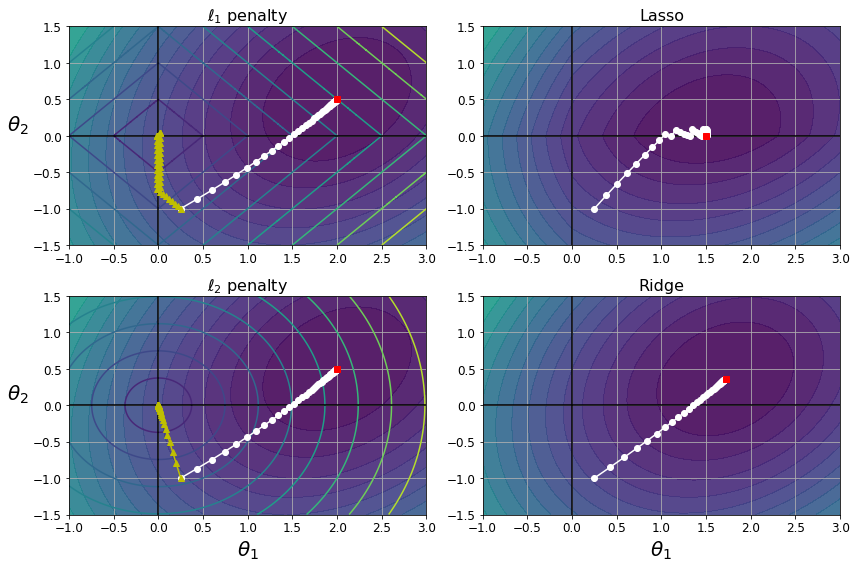

In [112]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()


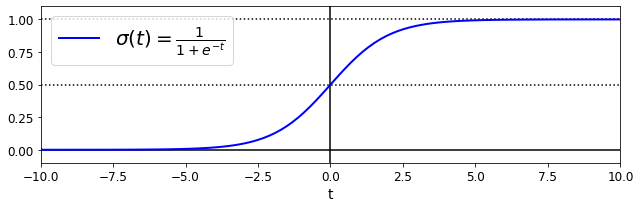

In [114]:
t=np.linspace(-10,10,100)
sig=1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],"k-")
plt.plot([-10,10],[0.5,0.5],"k:")
plt.plot([-10,10],[1,1],"k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t,sig,"b-",linewidth=2,label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc='upper left',fontsize=20)
plt.axis([-10,10,-0.1,1.1])
plt.show()


In [117]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [118]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [119]:
X=iris['data'][:,3:] #꽃잎 넓이
y=(iris['target']==2).astype(np.int) #iris-virginica면 1 아니면 0

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='liblinear',random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

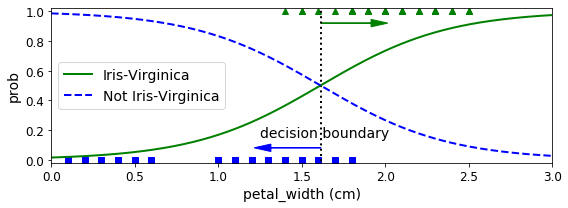

In [122]:
X_new=np.linspace(0,3,1000).reshape(-1,1) #꽃의 너비가 0~3cm인 모델 추정
y_proba=log_reg.predict_proba(X_new)
decision_boundary=X_new[y_proba[:,1]>=0.5][0]

plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0],'bs')
plt.plot(X[y==1],y[y==1],'g^')
plt.plot([decision_boundary,decision_boundary],[-1,2],"k:",linewidth=2)
plt.plot(X_new,y_proba[:,1],"g-",linewidth=2,label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],"b--",linewidth=2,label='Not Iris-Virginica')
plt.text(decision_boundary+0.02,0.15,"decision boundary",fontsize=14,color='k',ha='center')
plt.arrow(decision_boundary,0.08,-0.3,0,head_width=0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width=0.05,head_length=0.1,fc='g',ec='g')
plt.xlabel("petal_width (cm)",fontsize=14)
plt.ylabel("prob",fontsize=14)
plt.legend(loc='center left',fontsize=14)
plt.axis([0,3,-0.02,1.02])
plt.show()


In [123]:
decision_boundary

array([1.61561562])

In [124]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

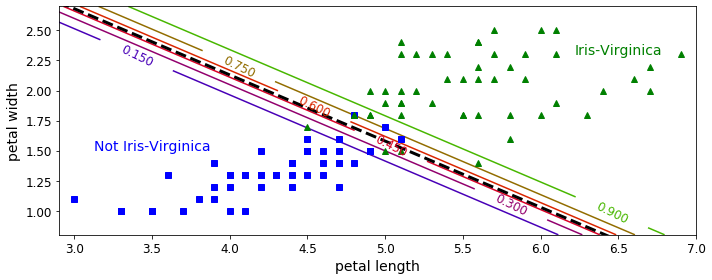

In [134]:
X = iris["data"][:, (2, 3)] #petai length , petal width
y = (iris["target"] == 2).astype(np.int)
#C: 규제 강도 조절 높을수록 규제강도가 약해짐
log_reg=LogisticRegression(solver='liblinear',C=10**10,random_state=42)
log_reg.fit(X,y)

x0,x1=np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),
                  np.linspace(0.8,2.7,200).reshape(-1,1))

X_new=np.c_[x0.ravel(),x1.ravel()]
y_proba=log_reg.predict_proba(X_new)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

zz=y_proba[:,1].reshape(x0.shape)
contour=plt.contour(x0,x1,zz,cmap=plt.cm.brg)

left_right=np.array([2.9,7])
boundary=-(log_reg.coef_[0][0]*left_right+log_reg.intercept_[0])/log_reg.coef_[0][1]
#coef_ : (클래스 수 ,특성 수)의 2차원 배열 , intercept_ : 클래스 수의 1차원 배열
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()


In [135]:
X=iris["data"][:,(2,3)] #petai length , petal width
y=iris["target"]
# multinomial-> LogisticRegression의 디폴트값은 일대다 전략이므로 소프트맥스 회귀를 이용하기위해 변환
# solver=lbfgs -> 소프트맥스회귀를 지원하는 알고리즘
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10,random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

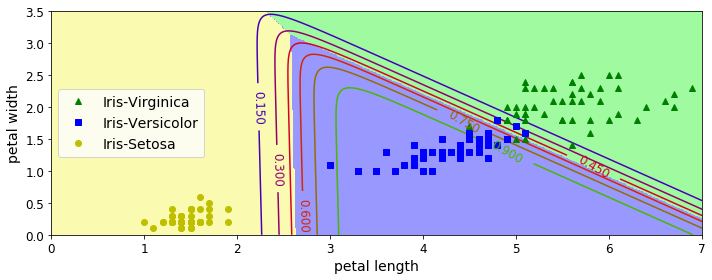

In [145]:
x0,x1=np.meshgrid(np.linspace(0,8,500).reshape(-1,1),
                  np.linspace(0,3.5,200).reshape(-1,1))
X_new=np.c_[x0.ravel(),x1.ravel()]

y_proba=softmax_reg.predict_proba(X_new)
y_predict=softmax_reg.predict(X_new)

zz1=y_proba[:,1].reshape(x0.shape)
zz=y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2,0],X[y==2,1],"g^",label="Iris-Virginica")
plt.plot(X[y==1,0],X[y==1,1],"bs",label="Iris-Versicolor")
plt.plot(X[y==0,0],X[y==0,1],"yo",label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour=plt.contour(x0,x1,zz1,cmap=plt.cm.brg)
plt.clabel(contour,inline=1,fontsize=12)
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc='center left',fontsize=14)
plt.axis([0,7,0,3.5])
plt.show()

In [146]:
softmax_reg.predict([[5,2]])

array([2])

In [147]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [238]:
X=iris["data"][:,(2,3)]
y=iris["target"]

In [239]:
X_with_bias=np.c_[np.ones([len(X),1]),X] #편향 추가 np.ones([len(X),1])

In [240]:
np.random.seed(2042)

In [241]:
test_ratio=0.2
validation_ratio=0.2
total_size=len(X_with_bias)

test_size=int(total_size*test_ratio)
validation_size=int(total_size*validation_ratio)
train_size=total_size-test_size-validation_size

rnd_indicies=np.random.permutation(total_size)

X_train=X_with_bias[rnd_indicies[:train_size]]
y_train=y[rnd_indicies[:train_size]]
X_valid=X_with_bias[rnd_indicies[train_size:-test_size]]
y_valid=y[rnd_indicies[train_size:-test_size]]
X_test=X_with_bias[rnd_indicies[-test_size:]]
y_test=y[rnd_indicies[-test_size:]]

In [242]:
def to_one_hot(y):
    n_classes=y.max()+1
    m=len(y)
    Y_one_hot=np.zeros((m,n_classes))
    Y_one_hot[np.arange(m),y]=1 
    return Y_one_hot

In [243]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [244]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [245]:
Y_train_one_hot=to_one_hot(y_train)
Y_valid_one_hot=to_one_hot(y_valid)
Y_test_one_hot=to_one_hot(y_test)

In [246]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [247]:
n_inputs=X_train.shape[1] #==3 특성2와 편향
n_outputs=len(np.unique(y_train)) # ==3 클래스 수

In [248]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7 # p가 이면 log(p)를 계산할 수 없기 때문에 작은 값을 더함

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.3955207080453019
1000 0.30749414568128014
1500 0.2625625596997038
2000 0.23337617569271762
2500 0.21239528202854902
3000 0.1964181323216289
3500 0.18377357309797845
4000 0.17347984352857324
4500 0.16491433684690537
5000 0.15766023346812322


In [249]:
Theta

array([[ 8.43265194,  1.08153825, -9.84315298],
       [-2.00513502,  0.2494366 ,  0.80598907],
       [-2.5683867 , -0.86904814,  4.1185525 ]])

In [250]:
logits=X_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)

accuracy_score=np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [251]:
#릿지 회귀 . l2패널치 부여
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7 # p가 이면 log(p)를 계산할 수 없기 때문에 작은 값을 더함
alpha=0.1 # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss=1/2*np.sum(np.square(Theta[1:]))
    loss=xentropy_loss+alpha*l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)+np.r_[np.zeros([1,n_outputs]),alpha*Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629507
1000 0.503640075014894
1500 0.4946891059460322
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [252]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [253]:
#릿지 회귀 . l2패널치 부여 + 조기종료
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7 # p가 이면 log(p)를 계산할 수 없기 때문에 작은 값을 더함
alpha=0.1 # 규제 하이퍼파라미터
best_loss=np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break    

0 4.7096017363419875
500 0.5739711987633518
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399382
2765 0.53254609667919
2766 0.5325460971327975 early stopping!


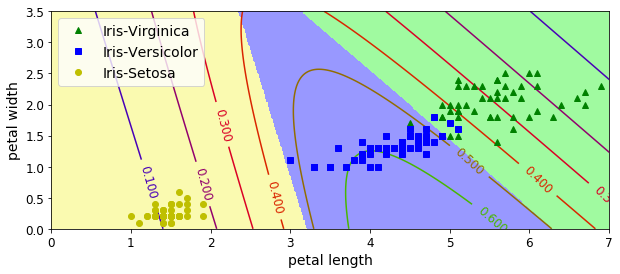

In [254]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [256]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333